In [1]:
import numpy as np
import seaborn as sns
from itertools import product
from ot import compute_joint
from os.path import expanduser
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
means = np.array([6, 8])

sigmax = 2.0
sigmay = 3.0
corr = 0.5
covs = np.array([[sigmax**2, corr*sigmax*sigmay], 
                  [corr*sigmax*sigmay, sigmay**2]])
ns = 10000

data = np.random.multivariate_normal(means, covs, ns).T

In [3]:
# check correlation
np.corrcoef(data)[0, 1]

0.5077418230537761

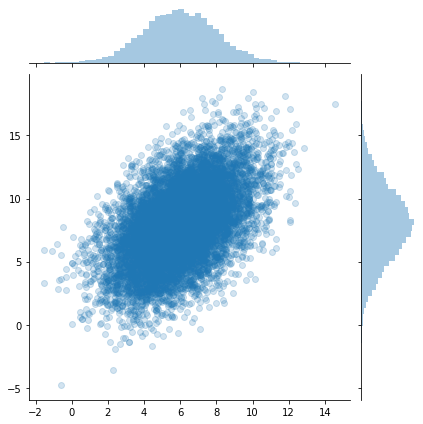

In [4]:
sns.jointplot(data[0], data[1], alpha=0.2)

In [5]:
delta = 1.0
xbins = np.arange(0, 10.1, delta)
ybins = np.arange(0, 15.1, delta)

hh = np.histogram2d(data[0], data[1], (xbins, ybins))
ojpdf = hh[0]
ojpdf /= ojpdf.sum()
xpdf = ojpdf.sum(axis=1)
ypdf = ojpdf.sum(axis=0)

In [6]:
def plot_heatmap(data):
    ax = sns.heatmap(data.T)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.invert_yaxis()

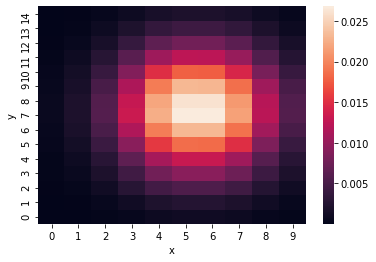

In [7]:
jpdf_prod = (xpdf.reshape(-1, 1)*np.ones(ojpdf.shape)*ypdf)
plot_heatmap(jpdf_prod)

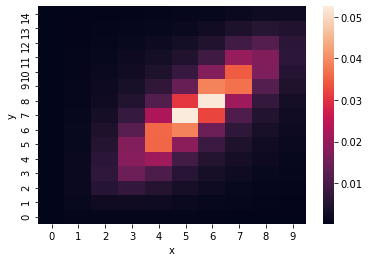

In [8]:
jpdfc = compute_joint(xpdf, ypdf, corr=0.5)
plot_heatmap(jpdfc)

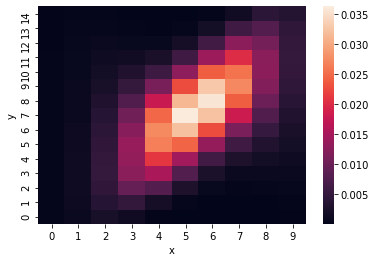

In [9]:
jpdf_reg = compute_joint(xpdf, ypdf, corr=0.5, gamma=1.)
plot_heatmap(jpdf_reg)

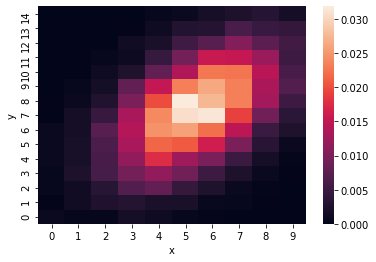

In [10]:
plot_heatmap(ojpdf)